In [1]:
# Supressing the warnings.

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries and packages.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, cross_val_predict,RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier

In [3]:
hr=pd.read_csv('train.csv')
hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
hr.shape

(54808, 14)

In [5]:
hr.describe(percentiles=[])

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
hr['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [7]:
hr.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
100*(hr.isnull().sum()/len(hr.index)).round(2)

employee_id             0.0
department              0.0
region                  0.0
education               4.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    8.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
is_promoted             0.0
dtype: float64

In [9]:
hr.loc[hr['previous_year_rating'].isnull(),['length_of_service']]

,length_of_service
10,1
23,1
29,1
56,1
58,1
62,1
66,1
67,1
84,1
89,1


In [10]:
hr.loc[hr['education'].isnull()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0
82,66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,0,53,0
87,69094,Sales & Marketing,region_2,NaN,m,sourcing,1,39,1.0,9,0,0,49,0
90,62658,Sales & Marketing,region_2,NaN,f,sourcing,1,20,NaN,1,0,0,55,0
189,6254,Operations,region_2,NaN,f,other,1,33,4.0,9,0,0,64,0
204,60761,Operations,region_16,NaN,f,other,1,31,4.0,2,0,0,62,0
231,57235,Sales & Marketing,region_26,NaN,m,other,1,22,4.0,2,0,0,51,0


In [11]:
hr['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [12]:
hr.loc[hr['previous_year_rating'].isnull(),['is_promoted','length_of_service']]

,is_promoted,length_of_service
10,0,1
23,0,1
29,0,1
56,0,1
58,0,1
62,0,1
66,1,1
67,1,1
84,1,1
89,0,1


In [13]:
hr['previous_year_rating']=hr['previous_year_rating'].fillna(value=0)

In [14]:
100*(hr.isnull().sum()/len(hr.index)).round(2)

employee_id             0.0
department              0.0
region                  0.0
education               4.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
is_promoted             0.0
dtype: float64

In [15]:
hr['education']=hr['education'].fillna(value="Bachelor's")

In [16]:
100*(hr.isnull().sum()/len(hr.index)).round(2)

employee_id             0.0
department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
is_promoted             0.0
dtype: float64

In [17]:
hr['education'].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [18]:
hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


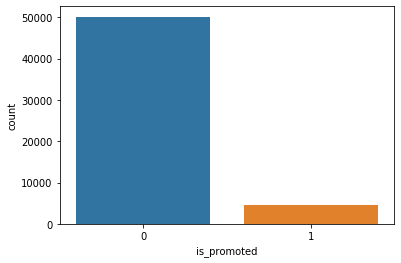

In [19]:
sns.countplot(hr['is_promoted'])

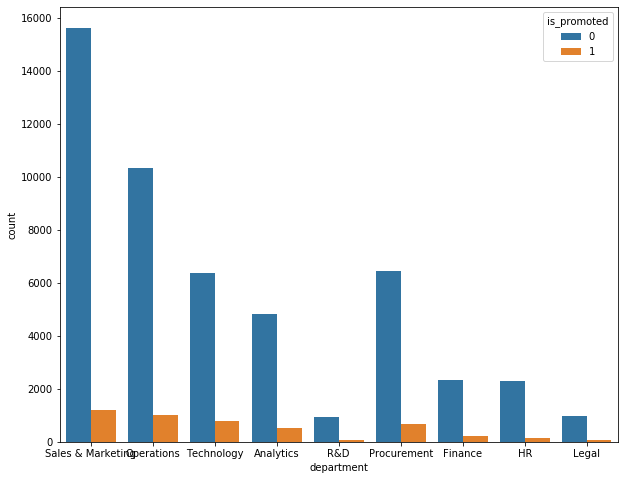

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(hr['department'],hue=hr['is_promoted'])
plt.show()

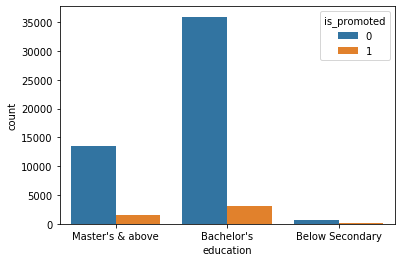

In [21]:
sns.countplot(hr['education'],hue=hr['is_promoted'])
plt.show()

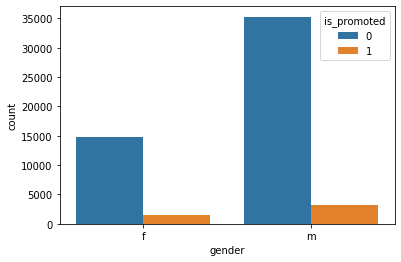

In [22]:
sns.countplot(hr['gender'],hue=hr['is_promoted'])
plt.show()

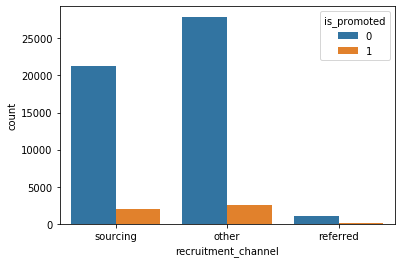

In [23]:
sns.countplot(hr['recruitment_channel'],hue=hr['is_promoted'])
plt.show()

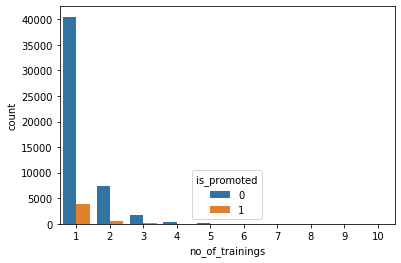

In [24]:
sns.countplot(hr['no_of_trainings'],hue=hr['is_promoted'])
plt.show()

In [27]:
hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [28]:
hr.drop('region',axis=1,inplace=True)

In [29]:
hr.shape

(54808, 13)

In [30]:
dpt=pd.get_dummies(hr['department'],drop_first=True)
dpt.head()

,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1


In [31]:
hr=pd.concat([hr,dpt],axis=1)
hr.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,65438,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0
1,65141,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0,0,0,1,0,0,0,0
2,7513,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,1,0
3,2542,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0
4,48945,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1


In [32]:
edu=pd.get_dummies(hr['education'],drop_first=True)
edu.head()

,Below Secondary,Master's & above
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0


In [33]:
hr=pd.concat([hr,edu],axis=1)
hr.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Below Secondary,Master's & above
0,65438,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0,0,1
1,65141,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0,0,0,1,0,0,0,0,0,0
2,7513,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,1,0,0,0
3,2542,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0,0,0
4,48945,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1,0,0


In [34]:
hr['gender']=hr['gender'].apply(lambda x: 0 if x=='f' else 1)
hr.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Below Secondary,Master's & above
0,65438,Sales & Marketing,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0,0,1
1,65141,Operations,Bachelor's,1,other,1,30,5.0,4,0,0,60,0,0,0,0,1,0,0,0,0,0,0
2,7513,Sales & Marketing,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,1,0,0,0
3,2542,Sales & Marketing,Bachelor's,1,other,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0,0,0
4,48945,Technology,Bachelor's,1,other,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1,0,0


In [35]:
src=pd.get_dummies(hr['recruitment_channel'],drop_first=True)
src.head()

,referred,sourcing
0,0,1
1,0,0
2,0,1
3,0,0
4,0,0


In [36]:
hr=pd.concat([hr,src],axis=1)
hr.head()

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Below Secondary,Master's & above,referred,sourcing
0,65438,Sales & Marketing,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0,0,1,0,1
1,65141,Operations,Bachelor's,1,other,1,30,5.0,4,0,0,60,0,0,0,0,1,0,0,0,0,0,0,0,0
2,7513,Sales & Marketing,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,1,0,0,0,0,1
3,2542,Sales & Marketing,Bachelor's,1,other,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0,0,0,0,0
4,48945,Technology,Bachelor's,1,other,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1,0,0,0,0


In [37]:
hr.drop(['department','education','recruitment_channel'],axis=1,inplace=True)
hr.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Below Secondary,Master's & above,referred,sourcing
0,65438,0,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0,0,1,0,1
1,65141,1,1,30,5.0,4,0,0,60,0,0,0,0,1,0,0,0,0,0,0,0,0
2,7513,1,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,1,0,0,0,0,1
3,2542,1,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0,0,0,0,0
4,48945,1,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1,0,0,0,0


In [38]:
hr.shape

(54808, 22)

In [39]:
df=hr

In [40]:
df.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Below Secondary,Master's & above,referred,sourcing
0,65438,0,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0,0,1,0,1
1,65141,1,1,30,5.0,4,0,0,60,0,0,0,0,1,0,0,0,0,0,0,0,0
2,7513,1,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,1,0,0,0,0,1
3,2542,1,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0,0,0,0,0
4,48945,1,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1,0,0,0,0


In [41]:
X= df.drop(['employee_id','is_promoted'],axis=1)
y=df['is_promoted']

In [42]:
# Splitting the dataset into train-test.

from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, stratify = y, shuffle = True, random_state = 100)

In [43]:
# Looking at the dimensions of the train and test sets.

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43846, 20)
(10962, 20)
(43846,)
(10962,)


In [44]:
# looking at the proportion of target variable in train and test sets.

print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

4668
3734
934


In [45]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)

In [46]:
X_train_std[:10]

array([[ 0.65281273, -0.41654056, -0.75447639, -0.71761401, -0.43518143,
        -0.73397963, -0.15370781, -0.78234105, -0.22038849, -0.21516061,
        -0.13822306, -0.51254283, -0.38686819, -0.13675927,  1.51205618,
        -0.38881387, -0.12333778, -0.60948606, -0.14599065,  1.16808841],
       [ 0.65281273, -0.41654056,  0.68211457, -0.71761401,  2.14936008,
        -0.73397963, -0.15370781, -0.18466579, -0.22038849, -0.21516061,
        -0.13822306,  1.95105647, -0.38686819, -0.13675927, -0.66135109,
        -0.38881387, -0.12333778,  1.64072662, -0.14599065, -0.85609958],
       [ 0.65281273, -0.41654056, -1.27687311, -2.0544811 , -1.14005639,
        -0.73397963, -0.15370781, -1.38001631, -0.22038849, -0.21516061,
        -0.13822306, -0.51254283, -0.38686819, -0.13675927,  1.51205618,
        -0.38881387, -0.12333778, -0.60948606, -0.14599065, -0.85609958],
       [ 0.65281273,  1.22395503, -1.53807147, -2.0544811 , -1.14005639,
        -0.73397963, -0.15370781,  1.45894118, -

In [47]:
X_test_std=sc.transform(X_test)

In [48]:
X_test_std[:10]

array([[-1.53183288, -0.41654056, -0.75447639,  0.61925308, -0.20022311,
        -0.73397963, -0.15370781, -1.08117868, -0.22038849, -0.21516061,
        -0.13822306, -0.51254283, -0.38686819, -0.13675927,  1.51205618,
        -0.38881387, -0.12333778, -0.60948606, -0.14599065, -0.85609958],
       [ 0.65281273, -0.41654056, -0.75447639,  0.61925308, -0.90509807,
        -0.73397963, -0.15370781, -0.3340846 , -0.22038849, -0.21516061,
         7.23468262, -0.51254283, -0.38686819, -0.13675927, -0.66135109,
        -0.38881387, -0.12333778, -0.60948606, -0.14599065, -0.85609958],
       [ 0.65281273, -0.41654056, -0.75447639,  0.61925308, -0.90509807,
        -0.73397963, -0.15370781, -0.2593752 , -0.22038849, -0.21516061,
        -0.13822306,  1.95105647, -0.38686819, -0.13675927, -0.66135109,
        -0.38881387, -0.12333778, -0.60948606, -0.14599065,  1.16808841],
       [ 0.65281273, -0.41654056,  0.02911868,  1.28768663,  0.26969352,
         1.36243564,  6.50585021, -0.55821283, -

In [49]:
X_test_std=pd.DataFrame(X_test_std)
col=X_test.columns
X_test_std.columns=col
X_test_std.head()

,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Below Secondary,Master's & above,referred,sourcing
0,-1.531833,-0.416541,-0.754476,0.619253,-0.200223,-0.733980,-0.153708,-1.081179,-0.220388,-0.215161,-0.138223,-0.512543,-0.386868,-0.136759,1.512056,-0.388814,-0.123338,-0.609486,-0.145991,-0.856100
1,0.652813,-0.416541,-0.754476,0.619253,-0.905098,-0.733980,-0.153708,-0.334085,-0.220388,-0.215161,7.234683,-0.512543,-0.386868,-0.136759,-0.661351,-0.388814,-0.123338,-0.609486,-0.145991,-0.856100
2,0.652813,-0.416541,-0.754476,0.619253,-0.905098,-0.733980,-0.153708,-0.259375,-0.220388,-0.215161,-0.138223,1.951056,-0.386868,-0.136759,-0.661351,-0.388814,-0.123338,-0.609486,-0.145991,1.168088
3,0.652813,-0.416541,0.029119,1.287687,0.269694,1.362436,6.505850,-0.558213,-0.220388,-0.215161,-0.138223,1.951056,-0.386868,-0.136759,-0.661351,-0.388814,-0.123338,-0.609486,-0.145991,-0.856100
4,0.652813,-0.416541,-0.362679,0.619253,-0.435181,-0.733980,-0.153708,-1.454726,-0.220388,-0.215161,-0.138223,-0.512543,-0.386868,-0.136759,1.512056,-0.388814,-0.123338,-0.609486,-0.145991,1.168088


In [50]:
lr=LogisticRegression()
lr.fit(X_train_std,y_train)
y_pred=lr.predict(X_test_std)

In [51]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10028
           1       0.82      0.25      0.38       934

    accuracy                           0.93     10962
   macro avg       0.88      0.62      0.67     10962
weighted avg       0.92      0.93      0.91     10962



In [53]:
print(metrics.confusion_matrix(y_test, y_pred))

[[9977   51]
 [ 701  233]]


In [54]:
# Hyperparameter tuning for Logistic Regression model.

log_reg_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = log_reg_params, cv = 3, n_jobs = -1, verbose = 1,scoring='f1')

In [55]:
# Fitting the Grid Search to the training dataset.

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   13.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [56]:
# Getting the optimal accuracy score and hyperparameters.

print('We can get f1 of', grid_search.best_score_.round(4), 'by using', grid_search.best_params_)

We can get f1 of 0.2288 by using {'C': 100, 'penalty': 'l2'}


In [57]:
# Building a model with the best hyperparameters.

log_reg_final_1 = LogisticRegression(C = 100, penalty = 'l2')

# Fitting on the training dataset.

log_reg_final_1.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
# Making predictions on the test dataset.

log_reg_final_prediction_1 = log_reg_final_1.predict(X_test)

In [59]:
# Checking the report of our final model.

print(classification_report(y_test, log_reg_final_prediction_1))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10028
           1       0.89      0.09      0.17       934

    accuracy                           0.92     10962
   macro avg       0.90      0.54      0.56     10962
weighted avg       0.92      0.92      0.89     10962



In [60]:
# Looking at the confusion matrix.

confusion1 = metrics.confusion_matrix(y_test, log_reg_final_prediction_1)
confusion1

array([[10017,    11],
       [  849,    85]], dtype=int64)

In [61]:
# Calculating the AUC.

roc = metrics.roc_auc_score(y_test, log_reg_final_prediction_1)
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 54.50%


In [62]:
rf = RandomForestClassifier(random_state=100)

In [63]:
rf.fit(X_train_std,y_train)
y_pred_rf=rf.predict(X_test_std)

In [64]:
y_pred_rf[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [65]:
# Looking at the confusion matrix.

confusion1 = metrics.confusion_matrix(y_test, y_pred_rf)
confusion1

array([[9920,  108],
       [ 628,  306]], dtype=int64)

In [66]:
# Creating the parameter grid.

param_grid = {'max_depth': [3, 4, 5], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(100, 400, 200),
              'n_estimators': [100, 200, 300], 'max_features': [10, 12, 14]}

# Instantiating the random forest model.

rf_tune = RandomForestClassifier(random_state=100)

# Instantiating the Grid Search model.

grid_search = GridSearchCV(estimator = rf_tune, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1,scoring='f1')

In [67]:
# Fitting the Grid Search to the training dataset.

grid_search.fit(X_train_std, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 14.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [68]:
grid_search.best_params_

{'max_depth': 3,
 'max_features': 14,
 'min_samples_leaf': 300,
 'min_samples_split': 100,
 'n_estimators': 100}

In [69]:
rf_tune1 = RandomForestClassifier(bootstrap=True, max_depth=3, max_features=14, min_samples_leaf=300, 
                                  min_samples_split=100, n_estimators=100, random_state=100)
rf_tune1.fit(X_train_std,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=14,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=300, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [70]:
y_pred_rf=rf_tune1.predict(X_test_std)
y_pred_rf[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [71]:
# Looking at the confusion matrix.

confusion1 = metrics.confusion_matrix(y_test, y_pred_rf)
confusion1

array([[9996,   32],
       [ 820,  114]], dtype=int64)

In [72]:
from imblearn.over_sampling import SMOTE
X_train_smote, y_train_smote = SMOTE(random_state = 27).fit_resample(X_train_std, y_train)

In [73]:
# Looking at the dimensions of the train and test sets.

print(X_train_smote.shape)
print(X_test.shape)
print(y_train_smote.shape)
print(y_test.shape)

(80224, 20)
(10962, 20)
(80224,)
(10962,)


In [74]:
# Looking at the value_counts of y_train_smote.

y_train_smote.value_counts()

1    40112
0    40112
Name: is_promoted, dtype: int64

In [102]:
# Hyperparameter tuning for Logistic Regression model.

log_reg_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = log_reg_params, cv = 3, n_jobs = -1, verbose = 1,scoring='f1')

In [103]:
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    5.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [104]:
grid_search.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [107]:
log_reg_smt = LogisticRegression(C=0.01,penalty='l2')
log_reg_smt.fit(X_train_smote,y_train_smote)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
y_pred_log_smt=log_reg_smt.predict(X_test_std)
y_pred_log_smt[:10]

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [109]:
# Looking at the confusion matrix.

metrics.confusion_matrix(y_test, y_pred_log_smt)

array([[7555, 2473],
       [ 182,  752]], dtype=int64)

In [81]:
metrics.f1_score(y_test, y_pred_log_smt)

0.3616253907189228

In [82]:
# Creating the parameter grid.

param_grid = {'max_depth': [3, 4, 5], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(100, 400, 200),
              'n_estimators': [100, 200, 300], 'max_features': [10, 12, 14]}

# Instantiating the random forest model.

rf_tune_smt = RandomForestClassifier(random_state=100)

# Instantiating the Grid Search model.

grid_search = GridSearchCV(estimator = rf_tune_smt, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1,scoring='f1')

In [83]:
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 30.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [84]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 12,
 'min_samples_leaf': 100,
 'min_samples_split': 100,
 'n_estimators': 100}

In [85]:
rf_tune_smt1 = RandomForestClassifier(bootstrap=True, max_depth=5, max_features=12, min_samples_leaf=100, 
                                  min_samples_split=100, n_estimators=100, random_state=100)
rf_tune_smt1.fit(X_train_smote,y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=12,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [86]:
y_pred_rf_smt=rf_tune_smt1.predict(X_test_std)
y_pred_rf_smt[:10]

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [87]:
# Looking at the confusion matrix.

metrics.confusion_matrix(y_test, y_pred_rf_smt)

array([[6672, 3356],
       [ 104,  830]], dtype=int64)

In [88]:
metrics.f1_score(y_test, y_pred_rf_smt)

0.32421875

In [89]:
# Specifying the range of hyperparameters.

param_grid = {'learning_rate': [0.2, 0.5], 'subsample': [0.3, 0.6, 0.9], 'max_depth': [3, 4, 5, 6], 'n_estimators': [100, 200, 300]}          

# Specifying the model.

xgb_tune = XGBClassifier(random_state=100)

# Setting up GridSearchCV().

grid_search = GridSearchCV(estimator = xgb_tune, param_grid = param_grid, scoring = 'f1', cv = 3, verbose = 1,
                        return_train_score = True, n_jobs = -1) 

In [90]:
# Fitting the Grid Search to the training dataset.

grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 16.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.5], 'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300],
 

In [91]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}
0.9549612662946271


In [156]:
# Building a model with the best hyperparameters.

xgb_final_1_smt = XGBClassifier(learning_rate = 0.2, max_depth = 5, n_estimators = 200, subsample = 0.9)

# Fitting on the training dataset.

xgb_final_1_smt.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [157]:
y_pred_xgb_smt=xgb_final_1_smt.predict(X_test_std.values)
y_pred_xgb_smt[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [158]:
# Looking at the confusion matrix.

metrics.confusion_matrix(y_test, y_pred_xgb_smt)

array([[9995,   33],
       [ 614,  320]], dtype=int64)

In [159]:
metrics.f1_score(y_test, y_pred_xgb_smt).round(4)

0.4973

In [110]:
from imblearn.over_sampling import ADASYN
X_train_adasyn, y_train_adasyn = ADASYN(random_state = 27).fit_resample(X_train_std, y_train)

In [111]:
# Looking at the dimensions of the train and test sets.

print(X_train_adasyn.shape)
print(X_test_std.shape)
print(y_train_adasyn.shape)
print(y_test.shape)

(80400, 20)
(10962, 20)
(80400,)
(10962,)


In [112]:
# Looking at the value_counts of y_train_adasyn.

y_train_adasyn.value_counts()

1    40288
0    40112
Name: is_promoted, dtype: int64

In [113]:
# Hyperparameter tuning for Logistic Regression model.

log_reg_params = {'penalty': ['l1', 'l2'], 'C': [0.001,0.05,0.02,0.003,0.5,0.3,0.03,0.3,0.02, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = log_reg_params, cv = 3, n_jobs = -1, verbose = 1,scoring='f1')

In [114]:
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.05, 0.02, 0.003, 0.5, 0.3, 0.03, 0.3,
                               0.02, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [ ]:
grid_search.best_params_

In [ ]:
log_reg_ada=LogisticRegression(C=0.02,penalty='l2')
log_reg_ada.fit(X_train_adasyn,y_train_adasyn)

In [ ]:
y_pred_log_ada=log_reg_ada.predict(X_test_std)
y_pred_log_ada[:10]

In [ ]:
# Looking at the confusion matrix.

metrics.confusion_matrix(y_test, y_pred_log_ada)

In [ ]:
metrics.f1_score(y_test, y_pred_log_ada).round(4)

In [ ]:
# Creating the parameter grid.

param_grid = {'max_depth': [3, 4, 5], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(100, 400, 200),
              'n_estimators': [100, 200, 300], 'max_features': [10, 12, 14]}

# Instantiating the random forest model.

rf_tune_smt = RandomForestClassifier(random_state=100)

# Instantiating the Grid Search model.

grid_search = GridSearchCV(estimator = rf_tune_smt, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1,scoring='f1')

In [ ]:
grid_search.fit(X_train_adasyn,y_train_adasyn)

In [ ]:
grid_search.best_params_

In [ ]:
rf_tune_ada1 = RandomForestClassifier(bootstrap=True, max_depth=5, max_features=12, min_samples_leaf=100, 
                                  min_samples_split=300, n_estimators=100, random_state=100)
rf_tune_ada1.fit(X_train_adasyn,y_train_adasyn)

In [ ]:
y_pred_rf_ada=rf_tune_ada1.predict(X_test_std)
y_pred_rf_ada[:10]

In [ ]:
# Looking at the confusion matrix.

metrics.confusion_matrix(y_test, y_pred_rf_ada)

In [ ]:
metrics.f1_score(y_test, y_pred_rf_ada).round(4)

In [ ]:
# Specifying the range of hyperparameters.

param_grid = {'learning_rate': [0.2, 0.5], 'subsample': [0.3, 0.6, 0.9], 'max_depth': [3, 4, 5, 6], 'n_estimators': [100, 200, 300]}          

# Specifying the model.

xgb_tune = XGBClassifier(random_state=100)

# Setting up GridSearchCV().

grid_search = GridSearchCV(estimator = xgb_tune, param_grid = param_grid, scoring = 'f1', cv = 3, verbose = 1,
                        return_train_score = True, n_jobs = -1) 

In [ ]:
grid_search.fit(X_train_adasyn,y_train_adasyn)

In [ ]:
grid_search.best_params_

In [ ]:
xgb_final_ada=XGBClassifier(learning_rate=0.2,max_depth=4,n_estimators=300,subsample=0.9,random_state=100)
xgb_final_ada.fit(X_train_adasyn,y_train_adasyn)

In [ ]:
y_pred_xgb_ada=xgb_final_ada.predict(X_test_std)
y_pred_xgb_ada[:10]

In [ ]:
# Looking at the confusion matrix.

metrics.confusion_matrix(y_test, y_pred_xgb_ada)

In [ ]:
metrics.f1_score(y_test, y_pred_xgb_ada).round(4)

In [ ]:
gb_ada=GradientBoostingClassifier()
gb_ada.fit(X_train_adasyn,y_train_adasyn)

In [ ]:
y_pred_gb_ada=gb_ada.predict(X_test_std)
y_pred_gb_ada[:10]

In [ ]:
# Looking at the confusion matrix.

metrics.confusion_matrix(y_test, y_pred_gb_ada)

In [ ]:
metrics.f1_score(y_test, y_pred_gb_ada)

In [ ]:
kn_ada=KNeighborsClassifier()
kn_ada.fit(X_train_adasyn,y_train_adasyn)

In [ ]:
y_pred_kn_ada=kn_ada.predict(X_test_std)
y_pred_kn_ada[:10]

In [ ]:
# Looking at the confusion matrix.

metrics.confusion_matrix(y_test, y_pred_kn_ada)

In [ ]:
metrics.f1_score(y_test, y_pred_kn_ada).round(4)

In [182]:
from imblearn.under_sampling import RandomUnderSampler
X_train_random, y_train_random = RandomUnderSampler(random_state = 27).fit_resample(X_train_std, y_train)

In [183]:
# Looking at the dimensions of the train and test sets.

print(X_train_random.shape)
print(y_train_random.shape)

(7468, 20)
(7468,)


In [184]:
y_train_random.value_counts()

1    3734
0    3734
Name: is_promoted, dtype: int64

In [185]:
# Hyperparameter tuning for Logistic Regression model.

log_reg_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = log_reg_params, cv = 3, n_jobs = -1, verbose = 1,scoring='f1')

In [186]:
grid_search.fit(X_train_random,y_train_random)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    2.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [187]:
grid_search.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [188]:
log_reg_un1=LogisticRegression(C=0.1,penalty='l2')
log_reg_un1.fit(X_train_random,y_train_random)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [189]:
y_pred_log_un=log_reg_un1.predict(X_test_std)
y_pred_log_un[:10]

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [190]:
metrics.confusion_matrix(y_test,y_pred_log_un)

array([[7543, 2485],
       [ 182,  752]], dtype=int64)

In [191]:
metrics.f1_score(y_test,y_pred_log_un).round(4)

0.3606

In [192]:
# Creating the parameter grid.

param_grid = {'max_depth': [3, 4, 5], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(100, 400, 200),
              'n_estimators': [100, 200, 300], 'max_features': [10, 12, 14]}

# Instantiating the random forest model.

rf_tune_smt = RandomForestClassifier(random_state=100)

# Instantiating the Grid Search model.

grid_search = GridSearchCV(estimator = rf_tune_smt, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1,scoring='f1')

In [193]:
grid_search.fit(X_train_random,y_train_random)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   31.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [194]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 300,
 'n_estimators': 100}

In [195]:
rf_tune_un1 = RandomForestClassifier(bootstrap=True, max_depth=5, max_features=10, min_samples_leaf=100, 
                                  min_samples_split=300, n_estimators=100, random_state=100)
rf_tune_un1.fit(X_train_random,y_train_random)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=300,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [196]:
y_pred_rf_un=rf_tune_un1.predict(X_test_std)
y_pred_rf_un[:10]

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [ ]:
metrics.confusion_matrix(y_test,y_pred_rf_un)

In [ ]:
metrics.f1_score(y_test,y_pred_rf_un).round(4)

In [ ]:
# Specifying the range of hyperparameters.

param_grid = {'learning_rate': [0.2, 0.5], 'subsample': [0.3, 0.6, 0.9], 'max_depth': [3, 4, 5, 6], 'n_estimators': [100, 200, 300]}          

# Specifying the model.

xgb_tune = XGBClassifier(random_state=100)

# Setting up GridSearchCV().

grid_search = GridSearchCV(estimator = xgb_tune, param_grid = param_grid, scoring = 'f1', cv = 3, verbose = 1,
                        return_train_score = True, n_jobs = -1) 

In [ ]:
grid_search.fit(X_train_random,y_train_random)

In [ ]:
grid_search.best_params_

In [ ]:
xgb_final_un=XGBClassifier(learning_rate=0.2,max_depth=3,n_estimators=100,subsample=0.9,random_state=100)
xgb_final_un.fit(X_train_random,y_train_random)

In [ ]:
y_pred_xgb_un=xgb_final_un.predict(X_test_std)
y_pred_xgb_un[:10]

In [ ]:
metrics.confusion_matrix(y_test,y_pred_xgb_un)

In [ ]:
metrics.recall_score(y_test,y_pred_xgb_un).round(4)

In [ ]:
metrics.precision_score(y_test,y_pred_xgb_un).round(4)

In [115]:
# Specifying the range of hyperparameters.

param_grid = {'learning_rate': [0.2, 0.5], 'subsample': [0.3, 0.6, 0.9], 'max_depth': [3, 4, 5, 6], 'n_estimators': [100, 200, 300],
             'eta':[0.01,0.1,0.2]}          

# Specifying the model.

xgb_tune = XGBClassifier(random_state=100)

# Setting up GridSearchCV().

grid_search = GridSearchCV(estimator = xgb_tune, param_grid = param_grid, scoring = 'f1', cv = 3, verbose = 1,
                        return_train_score = True, n_jobs = -1) 

In [116]:
# Specifying the range of hyperparameters.

param_grid = {'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)}          

# Specifying the model.

xgb_tune = XGBClassifier(random_state=100,gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,learning_rate = 0.1,
                         n_estimators = 200)

# Setting up GridSearchCV().

grid_search = GridSearchCV(estimator = xgb_tune, param_grid = param_grid, scoring = 'f1', cv = 3, verbose = 1,
                        return_train_score = True, n_jobs = -1) 

In [117]:
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  3.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1, seed=27,
                                     silent=None, subsample=0.8, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_trai

In [118]:
grid_search.best_params_

{'max_depth': 9, 'min_child_weight': 1}

In [ ]:
# Specifying the range of hyperparameters.

param_grid = {'max_depth':[5,6,7,8,9],
 'min_child_weight':[0.2,0.5,1,2]}          

# Specifying the model.

xgb_tune = XGBClassifier(random_state=100,gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,learning_rate = 0.1,
                         n_estimators = 200)

# Setting up GridSearchCV().

grid_search = GridSearchCV(estimator = xgb_tune, param_grid = param_grid, scoring = 'f1', cv = 3, verbose = 1,
                        return_train_score = True, n_jobs = -1) 

In [ ]:
grid_search.fit(X_train_smote,y_train_smote)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [119]:
# Specifying the range of hyperparameters.

param_grid = {'n_estimators':range(100,1000,200)}          

# Specifying the model.

xgb_tune = XGBClassifier(random_state=100,gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,learning_rate = 0.1,min_child_weight= 0.2,max_depth=8)

# Setting up GridSearchCV().

grid_search = GridSearchCV(estimator = xgb_tune, param_grid = param_grid, scoring = 'f1', cv = 3, verbose = 1,
                        return_train_score = True, n_jobs = -1) 

In [120]:
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=8, min_child_weight=0.2,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1, seed=27,
                                     silent=None, subsample=0.8, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_estimators': range(100, 1000, 200)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=1

In [121]:
grid_search.best_params_

{'n_estimators': 300}

In [122]:
grid_search.best_score_

0.9550728159381453

In [123]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
xgb_tune = XGBClassifier(random_state=100, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27,learning_rate = 0.1,min_child_weight= 0.2,max_depth=8,
                         n_estimator=300)

# Setting up GridSearchCV().

grid_search = GridSearchCV(estimator = xgb_tune, param_grid = param_test3, scoring = 'f1', cv = 3, verbose = 1,
                        return_train_score = True, n_jobs = -1) 

In [124]:
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=8, min_child_weight=0.2,
                                     missing=None, n_estimator=300,
                                     n_estimators=100, n_jobs=1, nthread=4,
                                     objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1, seed=27,
                                     silent=None, subsample=0.8, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_tra

In [125]:
grid_search.best_params_

{'gamma': 0.0}

In [126]:
param_test4 = {
 'subsample':[i/10.0 for i in range(1,10,2)],
    'colsample_bytree':[i/10.0 for i in range(1,10,2)]
}
xgb_tune = XGBClassifier(random_state=100,
                         objective= 'binary:logistic', nthread=4, scale_pos_weight=1, 
                         seed=27,learning_rate = 0.1,min_child_weight= 0.2,max_depth=8,
                         n_estimator=300,gamma=0.0)

# Setting up GridSearchCV().

grid_search = GridSearchCV(estimator = xgb_tune, param_grid = param_test4, scoring = 'f1', cv = 3, verbose = 1,
                        return_train_score = True, n_jobs = -1) 

In [127]:
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  3.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0.0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=8, min_child_weight=0.2,
                                     missing=None, n_estimator=300,
                                     n_estimators=100, n_jobs=1, nthread=4,
                                     objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1, seed=27,
                                     silent=None, subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'subsample': [0.1, 0.3, 0.5

In [128]:
grid_search.best_params_

{'colsample_bytree': 0.9, 'subsample': 0.9}

In [173]:
xgb_final1_smt = XGBClassifier(random_state=100,
                         objective= 'binary:logistic', nthread=4, scale_pos_weight=1, 
                         seed=27,learning_rate = 0.1,min_child_weight= 0.2,max_depth=8,
                         n_estimator=300,gamma=0.0,subsample=0.9,colsample_bytree=0.9)

xgb_final1_smt.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=0.2, missing=None, n_estimator=300,
              n_estimators=100, n_jobs=1, nthread=4,
              objective='binary:logistic', random_state=100, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=27, silent=None,
              subsample=0.9, verbosity=1)

In [174]:
y_pred_xgb_final=xgb_final1_smt.predict(X_test_std.values)
y_pred_xgb_final[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [175]:
metrics.confusion_matrix(y_test,y_pred_xgb_final)

array([[9944,   84],
       [ 608,  326]], dtype=int64)

In [176]:
metrics.f1_score(y_test,y_pred_xgb_final).round(4)

0.4851

In [144]:
df_test=pd.read_csv('test.csv')
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [145]:
df_test.shape

(23490, 13)

In [146]:
df_test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [147]:
df_test['previous_year_rating']=df_test['previous_year_rating'].fillna(value=0)
df_test['education']=df_test['education'].fillna(value="Bachelor's")
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,0.0,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [148]:
df_test.drop('region',axis=1,inplace=True)
dpt=pd.get_dummies(df_test['department'],drop_first=True)
df_test=pd.concat([df_test,dpt],axis=1)
edu=pd.get_dummies(df_test['education'],drop_first=True)
df_test=pd.concat([df_test,edu],axis=1)
df_test['gender']=df_test['gender'].apply(lambda x: 0 if x=='f' else 1)
src=pd.get_dummies(df_test['recruitment_channel'],drop_first=True)
df_test=pd.concat([df_test,src],axis=1)
df_test.drop(['department','education','recruitment_channel'],axis=1,inplace=True)
df_test.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Below Secondary,Master's & above,referred,sourcing
0,8724,1,1,24,0.0,1,1,0,77,0,0,0,0,0,0,0,1,0,0,0,1
1,74430,0,1,31,3.0,5,0,0,51,0,1,0,0,0,0,0,0,0,0,0,0
2,72255,1,1,31,1.0,4,0,0,47,0,0,0,0,0,0,1,0,0,0,0,0
3,38562,0,3,31,2.0,9,0,0,65,0,0,0,0,1,0,0,0,0,0,0,0
4,64486,1,1,30,4.0,7,0,0,61,1,0,0,0,0,0,0,0,0,0,0,1


In [149]:
X_fnl= df_test.drop(['employee_id'],axis=1)

In [150]:
X_fnl.head()

,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Below Secondary,Master's & above,referred,sourcing
0,1,1,24,0.0,1,1,0,77,0,0,0,0,0,0,0,1,0,0,0,1
1,0,1,31,3.0,5,0,0,51,0,1,0,0,0,0,0,0,0,0,0,0
2,1,1,31,1.0,4,0,0,47,0,0,0,0,0,0,1,0,0,0,0,0
3,0,3,31,2.0,9,0,0,65,0,0,0,0,1,0,0,0,0,0,0,0
4,1,1,30,4.0,7,0,0,61,1,0,0,0,0,0,0,0,0,0,0,1


In [151]:
X_fnl_std=sc.fit_transform(X_fnl)
X_fnl_std=pd.DataFrame(X_fnl_std)
col=X_fnl.columns
X_fnl_std.columns=col
X_fnl_std.head()

,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Below Secondary,Master's & above,referred,sourcing
0,0.644516,-0.423094,-1.404150,-2.046893,-1.143200,1.336715,-0.152665,1.024263,-0.220698,-0.220061,-0.138961,-0.504386,-0.384100,-0.138163,-0.672489,2.607948,-0.127198,-0.618792,-0.139912,1.165417
1,-1.551551,-0.423094,-0.492612,-0.054180,-0.192590,-0.748103,-0.152665,-0.914377,-0.220698,4.544202,-0.138961,-0.504386,-0.384100,-0.138163,-0.672489,-0.383443,-0.127198,-0.618792,-0.139912,-0.858062
2,0.644516,-0.423094,-0.492612,-1.382655,-0.430243,-0.748103,-0.152665,-1.212629,-0.220698,-0.220061,-0.138961,-0.504386,-0.384100,-0.138163,1.487014,-0.383443,-0.127198,-0.618792,-0.139912,-0.858062
3,-1.551551,2.905264,-0.492612,-0.718418,0.758019,-0.748103,-0.152665,0.129506,-0.220698,-0.220061,-0.138961,-0.504386,2.603487,-0.138163,-0.672489,-0.383443,-0.127198,-0.618792,-0.139912,-0.858062
4,0.644516,-0.423094,-0.622832,0.610058,0.282714,-0.748103,-0.152665,-0.168746,4.531082,-0.220061,-0.138961,-0.504386,-0.384100,-0.138163,-0.672489,-0.383443,-0.127198,-0.618792,-0.139912,1.165417


In [160]:
y_fnl=xgb_final_1_smt.predict(X_fnl_std.values)
y_fnl[:10]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [171]:
y_fnl=pd.DataFrame(y_fnl)
df_outcome=pd.concat([df_test['employee_id'],y_fnl],axis=1)
df_outcome.head()

,employee_id,0
0,8724,1
1,74430,1
2,72255,1
3,38562,0
4,64486,1


In [172]:
df_outcome.to_csv('submission.csv')

In [177]:
#xgb_final1_smt
y_fnl2=xgb_final1_smt.predict(X_fnl_std.values)
y_fnl2[:10]

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [178]:
y_fnl2=pd.DataFrame(y_fnl2)
df_outcome1=pd.concat([df_test['employee_id'],y_fnl2],axis=1)
df_outcome1.head()

,employee_id,0
0,8724,1
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [179]:
df_outcome1.to_csv('submission_1.csv')

In [197]:
y_rf_fnl=rf_tune_un1.predict(X_fnl_std.values)
y_rf_fnl[:10]

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)